In [38]:
a = np.random.randint(1, 10, 25).reshape(5, 5)
np.linalg.inv(a)
a

array([[3, 1, 8, 4, 9],
       [2, 1, 4, 1, 2],
       [1, 6, 4, 5, 5],
       [5, 8, 1, 4, 9],
       [7, 9, 1, 2, 9]])

In [47]:
%load_ext autoreload
%autoreload 2
import sys
import numpy as np
from matplotlib import pyplot as plt
from gp_func import *


def draw(train_data, test_data, no_noise_data, mean_arr, var_arr):
    xtest = test_data.x
    xtrain = train_data.x
    ytrain = train_data.y
    
    var_arr = np.diag(var_arr)
    
    boundary_upper = np.empty(len(xtest))
    boundary_lower = np.empty(len(xtest))
    
    for i in range(len(xtest)):
        boundary_upper[i] = mean_arr[i] + var_arr[i]
        boundary_lower[i] = mean_arr[i] - var_arr[i]
    
    plt.figure(figsize=(15, 10))
    plt.scatter(xtrain, ytrain, label="Train Data", color="red")
    plt.plot(xtest, mean_arr, label="Predicted Line by limited test data")
    plt.plot(no_noise_data.x, no_noise_data.y, label="GT without noise", color="black", linestyle="dashed")
    plt.xlabel("x", fontsize=16)
    plt.ylabel("y", fontsize=16)
    plt.xlim(xmin, xmax)
    plt.ylim(-0.5, 3.5)
    plt.tick_params(labelsize=16)
    plt.title("Predicted line by Gaussian Process", fontsize="16")
    plt.fill_between(xtest, boundary_upper, boundary_lower, facecolor='y', alpha=0.3, color='blue')
    plt.legend(["Predicted Line by limited test data", "GT without noise", "Train Data with noise", "confidence interval $\pm\sigma$"], fontsize=16)
    plt.savefig("gp.png")
    plt.show()
    
    
# def main():
    
xmin = -10
xmax = 10
noise_level = 0.1

train_data = DataSet(xmin, xmax, num_data=50, noise_level=noise_level)
test_data = DataSet(xmin, xmax, num_data=1000, noise_level=noise_level)
no_noise_data = DataSet(xmin, xmax, num_data=1000, noise_level=0.0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


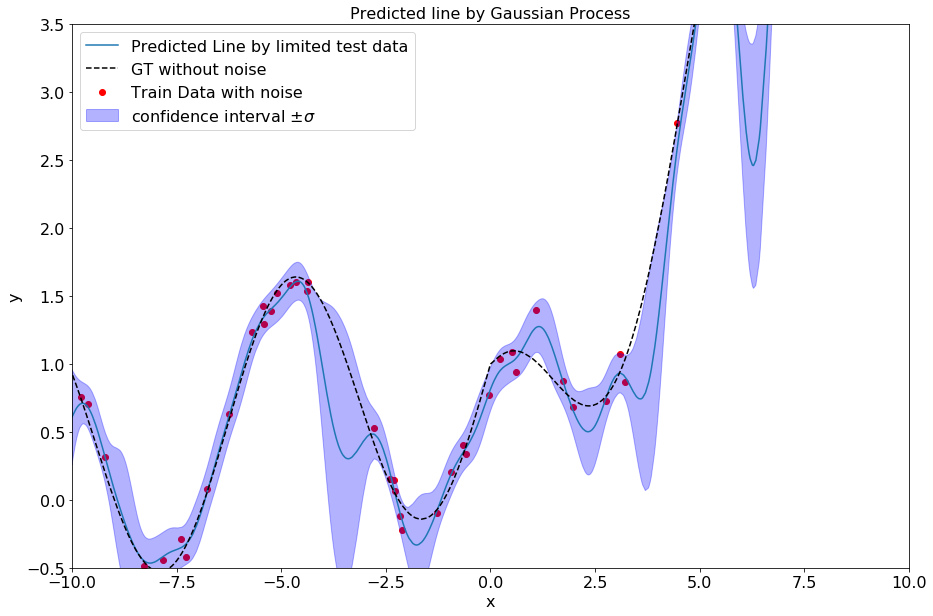

In [48]:
model = GaussianProcess(theta1=1, theta2=0.4, theta3=0.1)
model.train(train_data)
model.test(test_data)
draw(train_data, test_data, no_noise_data, model.mean_arr, model.var_arr)